# Задача IceBacketChallenge

Для начала напишем необходимые функции.

In [1]:
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
def generate_number_of_participans(n, N=3, p=0.5, distr='u'):
    invited_sum = 0
    if (distr == 'u'):
        for i in range(n):
            invited_sum = invited_sum + sps.randint.rvs(0,N + 1)
    elif (distr == 'b'):
        for i in range(n):
            invited_sum = invited_sum + sps.binom.rvs(N, p)
    elif (distr == 'ub'):
        for i in range(n):
            invited = randint(0, N+1)
            invited_sum = invited_sum + sps.binom.rvs(invited, p) 
    return invited_sum    

In [4]:
def generate_process(iterations_number, distr, N, p=0.5, check_zero=False, supremum=None):
    population_partisipans = [1]
    if (distr == 'u'):
        for i in range(iterations_number):
            last = population_partisipans[-1]
            if check_zero and last == 0:
                break
            elif supremum != None and last > supremum: 
                break
            else:
                population_partisipans.append(generate_number_of_participans(last,N, distr='u'))
    elif (distr == 'b'):
        for i in range(iterations_number):
            #print 'iter ', i
            last = population_partisipans[-1]
            if check_zero and last == 0:
                break
            elif supremum != None and last > supremum: 
                break
            else:
                population_partisipans.append(generate_number_of_participans(last, N=N, p=p, distr='b'))
    elif (distr == 'ub'):
         for i in range(iterations_number):
            last = population_partisipans[-1]
            if check_zero and last == 0:
                break
            elif supremum != None and last > supremum: 
                break
            else:
                population_partisipans.append(generate_number_of_participans(last, N, p, distr='ub'))
    return population_partisipans    

In [5]:
def generate_n_processes(iterations_number, distr='u', N=3, p=0.5, number_processes = 1):
    processes = []
    for i in range(number_processes):
        processes.append(generate_process(iterations_number, distr, N, p))
    return processes    

In [6]:
def is_enough_total_participants(process, needed_number):
    return sum(process) >= needed_number

In [7]:
def calculate_expected_moment_of_degeneration(number_iterations, N=3, p=0.5, distr='u',\
                                              number_processes=50, supr=2000):
    sum_moments = 0.
    degenerated_processes = 0
    for i in range(number_processes):
        #print i
        process = generate_process(number_iterations, distr, N, p=p, supremum=supr, check_zero=True)
        if process[-1] == 0:
            degenerated_processes = degenerated_processes + 1
            sum_moments = len(process) + sum_moments
    if degenerated_processes == 0:
        return -1
    else:
        return round(sum_moments/degenerated_processes,2)        

In [8]:
def draw_plot(number_iterations, processes, title=""):
    fig = plt.figure()
    plt.title(title)
    for i in range(len(processes)):
        fig.add_subplot(111).plot(range(number_iterations + 1), processes[i])
    plt.show()

In [9]:
def estimate_probability_of_degeneration(number_iterations, N, distr, number_processes, p=0.5, supremum=5000):
    degenerated = 0.
    for i in range(number_processes):
        #print 'process ', i
        process = generate_process(number_iterations, distr, N, p=p, supremum=supremum, check_zero=True)
        if process[-1] == 0:
            degenerated = degenerated + 1
    return round(degenerated/number_processes,2)  

In [10]:
def degeneration_equation(z,n):
    polynomial_sum = 0
    for i in range(n+1):
        polynomial_sum = polynomial_sum + z**i
    return (1./(n+1))*polynomial_sum - z

In [11]:
def estimate_probability_of_enough_branched_processes(number_iterations=50, N=3, p=0.5, distr='u',\
                                                      number_processes=100, needed_number=1000):
    counter = 0.
    for i in range(number_processes):
        process = generate_process(number_iterations, distr, N, p, supremum=needed_number, check_zero=True)
        if is_enough_total_participants(process, needed_number):
            counter = counter + 1
    return counter/number_processes

# Модель R{0, ... , N}

Сгенерируем несколько процессов их этого распределения.

#### N = 2

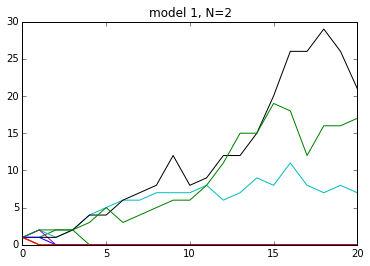

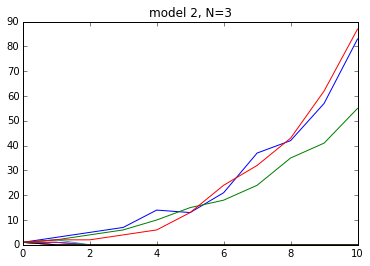

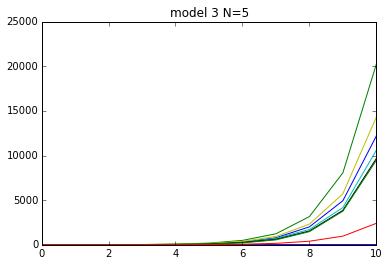

In [14]:
draw_plot(20, generate_n_processes(20, N=2, distr='u', number_processes=10), title='model 1, N=2')
draw_plot(10, generate_n_processes(10, N=3, distr='u', number_processes=10), title='model 2, N=3')
draw_plot(10, generate_n_processes(10, N=5, distr='u', number_processes=10), title='model 3 N=5')

Посчитаем теоретическую вероятность вырождения.

In [12]:
n_values = [2,3,4,5]

In [14]:
theory_estimation = []
for n in n_values:
    x = np.arange(0.001,1,0.001)
    min_index = argmin([abs(degeneration_equation(t, n)) for t in x])
    theory_estimation.append(x[min_index])
theory_estimation = [round(x,3) for x in theory_estimation]

[(2, 0.999), (3, 0.414), (4, 0.276), (5, 0.211)]

Оценим вероятность вырождения.

In [15]:
estimation = []
for n in n_values:
    estimation.append(estimate_probability_of_degeneration(1000, n, 'u', number_processes=100))

[(2, 1.0), (3, 0.4), (4, 0.34), (5, 0.15)]

Посчитаем математическое ожидание момента вырождения.

In [23]:
est_moment = []
for n in n_values:
    est_moment.append(calculate_expected_moment_of_degeneration(100, N=n, number_processes=200, distr='u'))
est_moment = [round(x,2) for x in est_moment]

[(2, 8.33), (3, 2.92), (4, 2.35), (5, 2.27)]


Оценим вероятноть участия 1000 человек.

In [21]:
est_branched = []
for n in n_values:    
    est_branched.append(estimate_probability_of_enough_branched_processes(N=n, distr='u', number_processes=500))

[(2, 0.008), (3, 0.618), (4, 0.726), (5, 0.794)]

Сгенерируем удобную таблицу результатов.

In [24]:
print '<table>'
print '<tr>'
print '\t<td>N</td>'
print '\t<td>Оценка вероятности вырождения</td>'
print '\t<td>Теоретическая вероятность вырождения</td>'
print '\t<td>Матожидание момента вырождения</td>'
print '\t<td>Оценка вероятности участия 1000 человек</td>'
print '</tr>'

for entry in zip(n_values, theory_estimation, estimation, est_moment, est_branched):
    print '<tr>'
    for i in entry:
        print '\t<td>', i,'</td>'
    print '</tr>'
    
print '</table>'

<table>
<tr>
	<td>N</td>
	<td>Оценка вероятности вырождения</td>
	<td>Теоретическая вероятность вырождения</td>
	<td>Матожидание момента вырождения</td>
	<td>Оценка вероятности участия 1000 человек</td>
</tr>
<tr>
	<td> 2 </td>
	<td> 0.999 </td>
	<td> 1.0 </td>
	<td> 8.33 </td>
	<td> 0.008 </td>
</tr>
<tr>
	<td> 3 </td>
	<td> 0.414 </td>
	<td> 0.4 </td>
	<td> 2.92 </td>
	<td> 0.618 </td>
</tr>
<tr>
	<td> 4 </td>
	<td> 0.276 </td>
	<td> 0.34 </td>
	<td> 2.35 </td>
	<td> 0.726 </td>
</tr>
<tr>
	<td> 5 </td>
	<td> 0.211 </td>
	<td> 0.15 </td>
	<td> 2.27 </td>
	<td> 0.794 </td>
</tr>
</table>


<table>
<tr>
	<td>N</td>
	<td>Оценка вероятности вырождения</td>
	<td>Теоретическая вероятность вырождения</td>
	<td>Матожидание момента вырождения</td>
	<td>Оценка вероятности участия 1000 человек</td>
</tr>
<tr>
	<td> 2 </td>
	<td> 0.999 </td>
	<td> 1.0 </td>
	<td> 8.33 </td>
	<td> 0.008 </td>
</tr>
<tr>
	<td> 3 </td>
	<td> 0.414 </td>
	<td> 0.4 </td>
	<td> 2.92 </td>
	<td> 0.618 </td>
</tr>
<tr>
	<td> 4 </td>
	<td> 0.276 </td>
	<td> 0.34 </td>
	<td> 2.35 </td>
	<td> 0.726 </td>
</tr>
<tr>
	<td> 5 </td>
	<td> 0.211 </td>
	<td> 0.15 </td>
	<td> 2.27 </td>
	<td> 0.794 </td>
</tr>
</table>


## Модель 2: $\xi \sim Bin(3,p)$

<table>
    <tr>
        <td>p</td>
        <td>Оценка вероятности вырождения</td>
        <td>Теоретическая вероятность вырождения</td>
        <td>Матожидание момента вырождения</td>
    </tr>
</table>

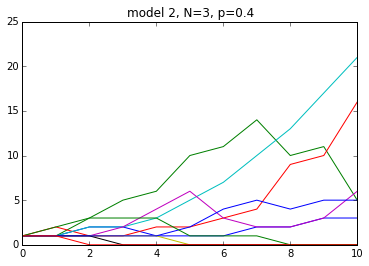

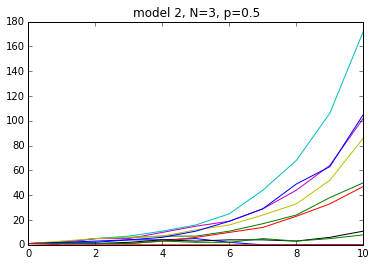

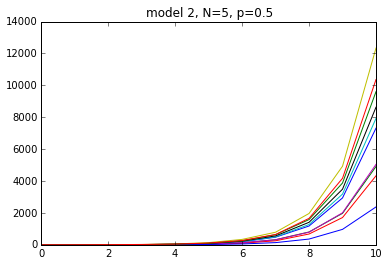

In [15]:
draw_plot(10, generate_n_processes(10, N=3, distr='b', number_processes=10, p=0.4), title="model 2, N=3, p=0.4")
draw_plot(10, generate_n_processes(10, N=3, distr='b', number_processes=10, p=0.5), title="model 2, N=3, p=0.5")
draw_plot(10, generate_n_processes(10, N=5, distr='b', number_processes=10, p=0.5), title="model 2, N=5, p=0.5")

Нарисуем для разных p графики функции вырождения: $f = \phi_\xi(z) - z$

In [15]:
def producing_expression(z,p):
    return (1-p)**3 + z*3*p*(1-p)**2 + z**2*3*p**2*(1-p) + z**3*p**3 - z

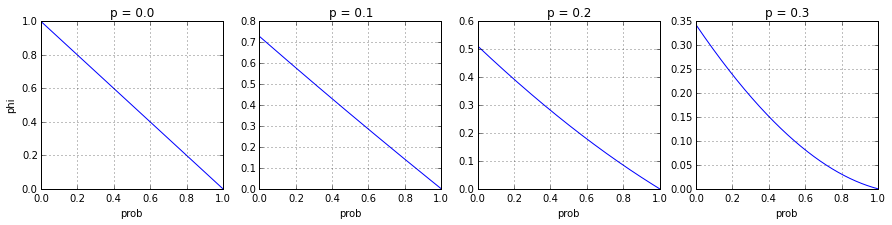

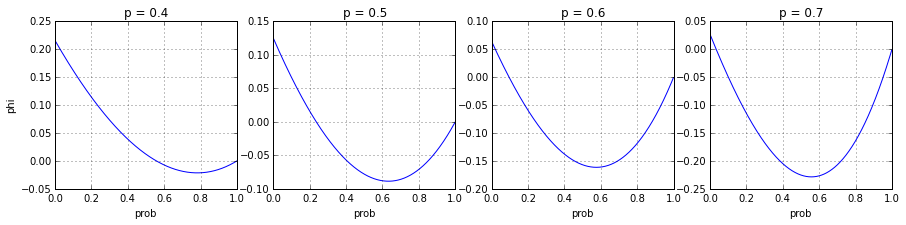

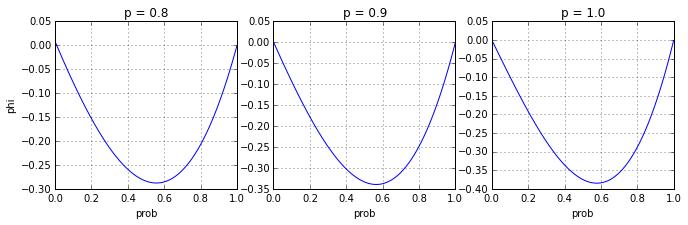

In [16]:
plt.figure(figsize=(15, 3))
for i, p in enumerate(np.arange(0,1.1,0.1)):
    x = np.arange(0,1,0.001)
    plt.subplot(1, 4, i % 4 + 1)
    plt.plot(x, [producing_expression(t, p) for t in x])
    plt.grid()
    plt.xlabel('prob')
    if i % 4 == 0:
        plt.ylabel('phi')
    plt.title('p = ' + str(p))
    if i % 4 == 3:
        plt.show()
        plt.figure(figsize=(15, 3))

Посчитаем теоретическую вероятность вырождения.

In [17]:
theory_degeneration_probabilities = []
p_values = np.arange(0,1.1,0.1)
p_values = [round(x,1) for x in p_values]

In [18]:
for p in p_values:
    x = np.arange(0.001,1,0.001)
    min_index = argmin([abs(producing_expression(t, p)) for t in x])
    theory_degeneration_probabilities.append(x[min_index])
theory_degeneration_probabilities = [round(x,3) for x in theory_degeneration_probabilities]
#zip(p_values, theory_degeneration_probabilities)

Посчитаем практическую вероятность вырождения.

In [19]:
est_degeneration = []
for p in p_values:
    est_degeneration.append(estimate_probability_of_degeneration(100, N=3, distr='b', p=p, number_processes = 100))

Оценим вероятность участия 1000 человек.

In [40]:
est_branched = []
for p in p_values:
    est_branched.append(estimate_probability_of_enough_branched_processes(50, N=3,p=p, distr='b'))

Для каждого p из $[0, 0.8]$ с шагом $0.1$ посчитаем матожидание момента вырождения 10 раз, найдем среднее этой выборки и дисперсию.

In [30]:
est_moment_mean = []
est_moment_std = []
for p in p_values[:-2]:
    est_moment_p = []
    for i in range(10):
        est_moment_p.append(calculate_expected_moment_of_degeneration(100, N=3, distr='b', p=p, number_processes = 100))
    
    est_moment_mean.append(round(np.mean(est_moment_p), 2))
    est_moment_std.append(round(np.std(est_moment_p),2))

Построим график по получившимся значениям.

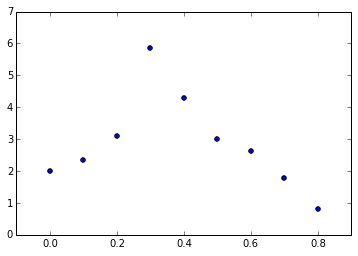

In [33]:
plt.figure()
plt.scatter(p_values[:-2], est_moment_mean)
plt.show()

Построим доверительные интервалы уровня 0.99 вида $(EM_{deg} - 3\sigma, EM_{deg} + 3\sigma)$.

In [35]:
print "Доверительные интервалы уровня 0.99:" 
for mean, d, p in zip(est_moment_mean, est_moment_std, p_values[:-2]):
    print "p = ", p,":(", max(0, mean - 3*d), ",", mean + 3*d, ")"

Доверительные интервалы уровня 0.99:
p =  0.0 :( 2.0 , 2.0 )
p =  0.1 :( 2.15 , 2.57 )
p =  0.2 :( 2.42 , 3.8 )
p =  0.3 :( 3.98 , 7.76 )
p =  0.4 :( 2.85 , 5.73 )
p =  0.5 :( 2.45 , 3.53 )
p =  0.6 :( 1.73 , 3.53 )
p =  0.7 :( 0 , 4.57 )
p =  0.8 :( 0 , 5.21 )


Составим удобную таблицу результатов.

In [46]:
s = ['a'] * 8
s[0] = '<table>'
s[1] = '<tr>'
s[2] = '\t<td>N</td>'
s[3] = '\t<td>Оценка вероятности вырождения</td>'
s[4] = '\t<td>Теоретическая вероятность вырождения</td>'
s[5] = '\t<td>Матожидание момента вырождения</td>'
s[6] = '\t<td>Оценка вероятности участия 1000 человек</td>'
s[7] = '</tr>'

for entry in zip(p_values, est_degeneration, theory_degeneration_probabilities, est_moment_mean, est_branched):
    s.append('<tr>')
    for i in entry:
        s.append('\t<td>'+ str(i) +'</td>')
    s.append('</tr>')
    
s.append('</table>')
for st in s:
    print st

<table>
<tr>
	<td>N</td>
	<td>Оценка вероятности вырождения</td>
	<td>Теоретическая вероятность вырождения</td>
	<td>Матожидание момента вырождения</td>
	<td>Оценка вероятности участия 1000 человек</td>
</tr>
<tr>
	<td>0.0</td>
	<td>1.0</td>
	<td>0.999</td>
	<td>2.0</td>
	<td>0.0</td>
</tr>
<tr>
	<td>0.1</td>
	<td>1.0</td>
	<td>0.999</td>
	<td>2.36</td>
	<td>0.0</td>
</tr>
<tr>
	<td>0.2</td>
	<td>1.0</td>
	<td>0.999</td>
	<td>3.11</td>
	<td>0.0</td>
</tr>
<tr>
	<td>0.3</td>
	<td>1.0</td>
	<td>0.999</td>
	<td>5.87</td>
	<td>0.0</td>
</tr>
<tr>
	<td>0.4</td>
	<td>0.61</td>
	<td>0.557</td>
	<td>4.29</td>
	<td>0.49</td>
</tr>
<tr>
	<td>0.5</td>
	<td>0.17</td>
	<td>0.236</td>
	<td>2.99</td>
	<td>0.77</td>
</tr>
<tr>
	<td>0.6</td>
	<td>0.07</td>
	<td>0.096</td>
	<td>2.63</td>
	<td>0.85</td>
</tr>
<tr>
	<td>0.7</td>
	<td>0.05</td>
	<td>0.034</td>
	<td>1.78</td>
	<td>0.97</td>
</tr>
<tr>
	<td>0.8</td>
	<td>0.01</td>
	<td>0.009</td>
	<td>0.8</td>
	<td>0.97</td>
</tr>
</table>


<table>
<tr>
	<td>N</td>
	<td>Оценка вероятности вырождения</td>
	<td>Теоретическая вероятность вырождения</td>
	<td>Матожидание момента вырождения</td>
	<td>Оценка вероятности участия 1000 человек</td>
</tr>
<tr>
	<td> 0.0 </td>
	<td> 0.999 </td>
	<td> 1.0 </td>
	<td> 2.0 </td>
	<td> 0.0 </td>
</tr>
<tr>
	<td> 0.1 </td>
	<td> 0.999 </td>
	<td> 1.0 </td>
	<td> 2.36 </td>
	<td> 0.0 </td>
</tr>
<tr>
	<td> 0.2 </td>
	<td> 0.999 </td>
	<td> 1.0 </td>
	<td> 3.11 </td>
	<td> 0.0 </td>
</tr>
<tr>
	<td> 0.3 </td>
	<td> 0.999 </td>
	<td> 1.0 </td>
	<td> 5.87 </td>
	<td> 0.0 </td>
</tr>
<tr>
	<td> 0.4 </td>
	<td> 0.557 </td>
	<td> 0.61 </td>
	<td> 4.29 </td>
	<td> 0.49 </td>
</tr>
<tr>
	<td> 0.5 </td>
	<td> 0.236 </td>
	<td> 0.17 </td>
	<td> 2.99 </td>
	<td> 0.77 </td>
</tr>
<tr>
	<td> 0.6 </td>
	<td> 0.096 </td>
	<td> 0.07 </td>
	<td> 2.63 </td>
	<td> 0.85 </td>
</tr>
<tr>
	<td> 0.7 </td>
	<td> 0.034 </td>
	<td> 0.05 </td>
	<td> 1.78 </td>
	<td> 0.97 </td>
</tr>
<tr>
	<td> 0.8 </td>
	<td> 0.009 </td>
	<td> 0.01 </td>
	<td> 0.8 </td>
	<td> 0.97 </td>
</tr>
</table>

## Модель 3: $\xi \sim \{0, ..., N\}, \eta \sim Bin(\xi, p)$

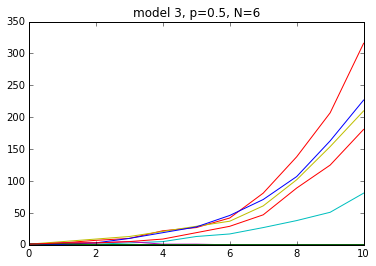

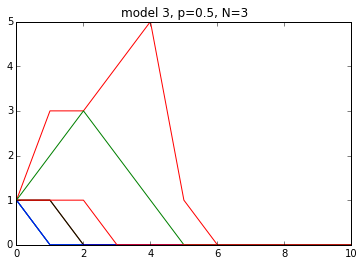

In [27]:
draw_plot(10, generate_n_processes(10,N=6, distr='ub', p = 0.5, number_processes=10), title="model 3, p=0.5, N=6")
draw_plot(10, generate_n_processes(10,N=3, distr='ub', p = 0.6, number_processes=10), title="model 3, p=0.5, N=3")

Для каждого $p\in \{0, 0.1, ..., 0.9, 1\}, N \in \{2,3, ..., 8\}$ оценим вероятность вырождения процесса.

In [48]:
est_degeneration = []
n_values = [i for i in arange(2, 8)]
for p in p_values:
    curr_p_prob = []
    for n in n_values:
        curr_p_prob.append(estimate_probability_of_degeneration(30, N=n, p=p, number_processes = 30, distr='ub'))
    est_degeneration.append(curr_p_prob)

In [49]:
print zip(p_values, est_degeneration)

[(0.0, [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]), (0.1, [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]), (0.2, [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]), (0.3, [1.0, 1.0, 1.0, 1.0, 1.0, 0.93]), (0.4, [1.0, 1.0, 1.0, 0.87, 0.73, 0.57]), (0.5, [1.0, 1.0, 0.9, 0.83, 0.43, 0.37]), (0.6, [1.0, 1.0, 0.67, 0.63, 0.4, 0.4]), (0.7, [1.0, 0.87, 0.63, 0.47, 0.33, 0.43]), (0.8, [1.0, 0.63, 0.2, 0.5, 0.33, 0.13]), (0.9, [0.97, 0.53, 0.33, 0.17, 0.2, 0.1]), (1.0, [0.9, 0.5, 0.2, 0.1, 0.17, 0.33])]


Аналогично для каждой пары параметров $p,N$ посчитаем матожидание момента вырождения. 

In [46]:
est_moment = []
for p in p_values:
    est_curr_p_moment = []
    for n in n_values:
        est_curr_p_moment.append(calculate_expected_moment_of_degeneration(40, N=n, p=p, number_processes=100, distr='ub'))
    est_moment.append(est_curr_p_moment)

In [47]:
est_moment

[[2.0, 2.0, 2.0, 2.0, 2.0, 2.0],
 [2.13, 2.21, 2.25, 2.45, 2.42, 2.42],
 [2.26, 2.46, 2.43, 2.44, 3.13, 3.39],
 [2.41, 2.56, 3.19, 3.7, 4.64, 5.13],
 [2.57, 3.1, 4.39, 5.42, 3.76, 3.48],
 [2.7, 3.98, 5.28, 3.01, 3.11, 2.79],
 [3.32, 4.73, 3.63, 2.66, 2.48, 2.61],
 [3.52, 5.85, 2.95, 2.85, 2.26, 2.42],
 [4.25, 3.7, 2.49, 2.5, 2.37, 2.11],
 [4.81, 3.38, 2.47, 2.39, 2.43, 2.08],
 [5.63, 3.33, 2.37, 2.3, 2.18, 2.17]]

А также посчитаем вероятнсть участия 1000 человек.

In [38]:
est_branched = []
for p in p_values:
    est_p_branched = []
    for n in n_values:
        est_p_branched.append(estimate_probability_of_enough_branched_processes(200, N=n,p=p, distr='ub', number_processes=50))
    est_branched.append(est_p_branched)

In [39]:
est_branched

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.1],
 [0.0, 0.0, 0.0, 0.0, 0.3, 0.5],
 [0.0, 0.0, 0.02, 0.3, 0.46, 0.66],
 [0.0, 0.0, 0.36, 0.56, 0.6, 0.86],
 [0.0, 0.08, 0.5, 0.64, 0.72, 0.86],
 [0.0, 0.34, 0.48, 0.64, 0.74, 0.7],
 [0.0, 0.46, 0.72, 0.8, 0.88, 0.82],
 [0.06, 0.6, 0.78, 0.76, 0.86, 0.82]]